### Etapas do Ciclo de Trabalho

- Obtenção de dados
- Análise Exploratória
- Métodos de extração de conhecimento
- Avaliação dos resultados

### Obtençãe Dados

- Kaggle
- UCI Machine Learning Repository

In [144]:
import pandas as pd #permite que manipulemos os dados como dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [78]:
df = pd.read_csv('movie_metadata.csv')

## Análise Exploratória

In [79]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [80]:
df.shape

(5043, 28)

In [81]:
df.dtypes
# o que ele coloca como objeto são variáveis categóricas

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [82]:
list(df.columns)
#lita todas as colunas do df

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [83]:
# vamos remover colunas que não importam na predição final do imdb_score
df.drop('movie_imdb_link', axis=1, inplace=True)

In [84]:
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [85]:
# como a maioria dos filmes são coloridos, isso não irá afetar nosso modelo, então também podemos remover esta coluna
df.drop('color', axis=1, inplace=True)

In [86]:
# procurar por dados faltantes
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [87]:
# indica quantos dados faltantes em cada coluna
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [88]:
# remove todas as linhas que possuem valores faltantes
# mas iremos fazer isso apenas com as colunas que possuem poucos dados faltantes
df.dropna(axis=0, subset=['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
                          'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'actor_1_name',
                          'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
                         'actor_2_facebook_likes', 'plot_keywords', 'title_year'], inplace=True)

In [89]:
df.shape

(4737, 26)

In [90]:
# retorna a quantidade de valores pra cada entrada na coluna indicada
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [91]:
# como a maior parte dos filmes possuem content_rating = R, iremos substituir os valores faltantes por R
df['content_rating'].fillna('R', inplace=True)

In [92]:
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [93]:
# como praticamente todos os filmes correspondem a dois valores e esses valores são quantitativos,
# faz mais sentido substituir os valores faltantes pela média ou mediana. Aqui iremos utilizar a mediana.

df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [94]:
# iremos fazer o mesmo para o orçamento do filme
df['budget'].fillna(df['budget'].median(), inplace=True)

In [95]:
# iremos fazer o mesmo para o faturamento do filme
df['gross'].fillna(df['gross'].median(), inplace=True)

In [96]:
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [97]:
# precisamos verificar se existem dados duplicados
df.duplicated().sum()

42

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.shape

(4695, 26)

In [100]:
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Korean           8
Portuguese       8
Danish           5
Dutch            4
Norwegian        4
Swedish          4
Hebrew           4
Persian          4
Arabic           3
Thai             3
Indonesian       2
Zulu             2
None             2
Aboriginal       2
Dari             2
Polish           1
Bosnian          1
Czech            1
Icelandic        1
Mongolian        1
Aramaic          1
Vietnamese       1
Filipino         1
Greek            1
Romanian         1
Telugu           1
Hungarian        1
Maya             1
Dzongkha         1
Kazakh           1
Name: language, dtype: int64

In [101]:
# nesse caso, mais de 90% dos nossos dados são da lingua inglesa, então essa variável não está trazendo informação
# relevante. Nesse caso, podemos remover essa coluna ou agrupar os dados em duas categorias: inglês e outras.
# Aqui vamos remover essa variável

df.drop('language', axis=1, inplace=True)

In [102]:
df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Denmark             11
Mexico              11
Ireland             11
Brazil               8
South Africa         8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Argentina            4
Iran                 4
West Germany         3
Czech Republic       3
Israel               3
Belgium              3
Switzerland          3
Hungary              2
Poland               2
Romania              2
Greece               2
Taiwan               2
Iceland              2
Philippines          1
Soviet Union         1
Georgia              1
Kyrgyzstan           1
Turkey               1
Aruba                1
Colombia   

In [103]:
# nesse caso podemos agrupar os resultados em 3 valores: Estados Unidos, Reino Unido e Outros.
# mas para fins didáticos iremos manter o exemplo simple e também dropar a coluna
df.drop('country', axis=1, inplace=True)

In [104]:
# iremos criar uma coluna a mais de lucro
df['Profit'] = df['budget'].sub(df['gross'], axis=0)

In [105]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [106]:
# também vamos criar uma coluna de porcentagem de lucro
df['Profit_Percentage'] = (df['Profit']/df['gross'])*100

In [107]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


In [108]:
df.to_csv('dados_imdb_analiseexpl.csv', index=False)

## Visualização de dados

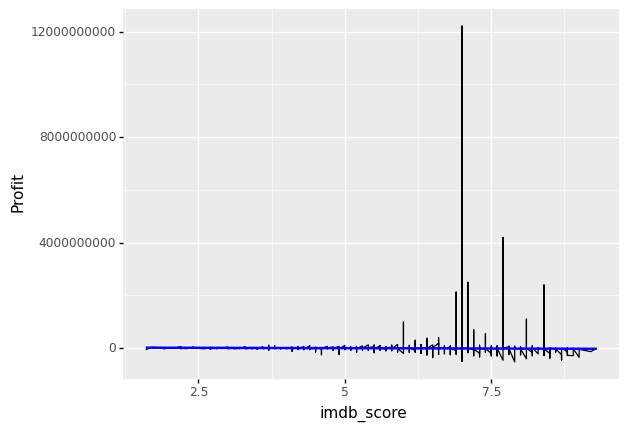

<ggplot: (8782207190881)>

In [109]:
# correlação entre a nota do filme no IMDB e o lucro
ggplot(aes(x='imdb_score', y='Profit'), data=df) +\
      geom_line() +\
      stat_smooth(colour='blue', span=1)

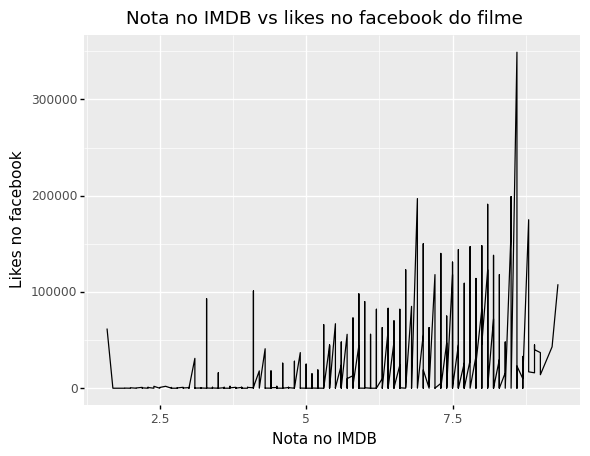

<ggplot: (8782206429269)>

In [110]:
# correlação entre a nota do filme no IMDB e o número de likes no facebook
(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota no IMDB vs likes no facebook do filme', x='Nota no IMDB', y='Likes no facebook')
)

/Users/leticiacristinaduartelima/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


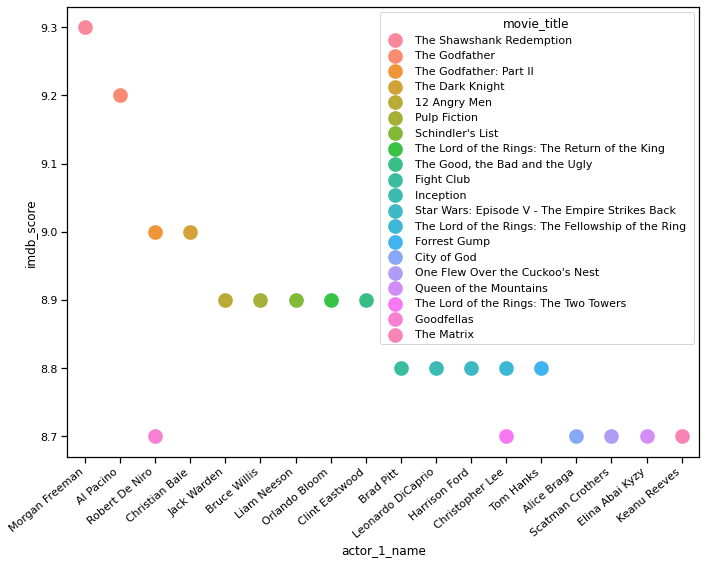

In [111]:
# correlacionar os 20 filmes com maior nota com os nomes dos atores no filme
plt.figure(figsize=(10,8))

df=df.sort_values(by='imdb_score', ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Preparação de dados

In [112]:
#vamos remover dados que não vão impactar diretamente na predição de sucesso de um filme
df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name',
                 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [113]:
df['genres'].value_counts()

Drama                                         209
Comedy                                        186
Comedy|Drama|Romance                          182
Comedy|Drama                                  180
Comedy|Romance                                149
                                             ... 
Action|Drama|Sci-Fi|Sport                       1
Adventure|Animation|Family|Musical              1
Animation|Comedy                                1
Adventure|Comedy|Crime|Family|Mystery           1
Adventure|Animation|Comedy|Fantasy|Romance      1
Name: genres, Length: 875, dtype: int64

In [114]:
df.drop('genres', axis=1, inplace=True)

In [115]:
# vamos remover as colunas que criamos de lucro, pois elas são dependentes de outras colunas e não queremos isso
# elas serviram para facilitar a nossa visualização
df.drop(columns=['Profit', 'Profit_Percentage'], axis=1, inplace=True)

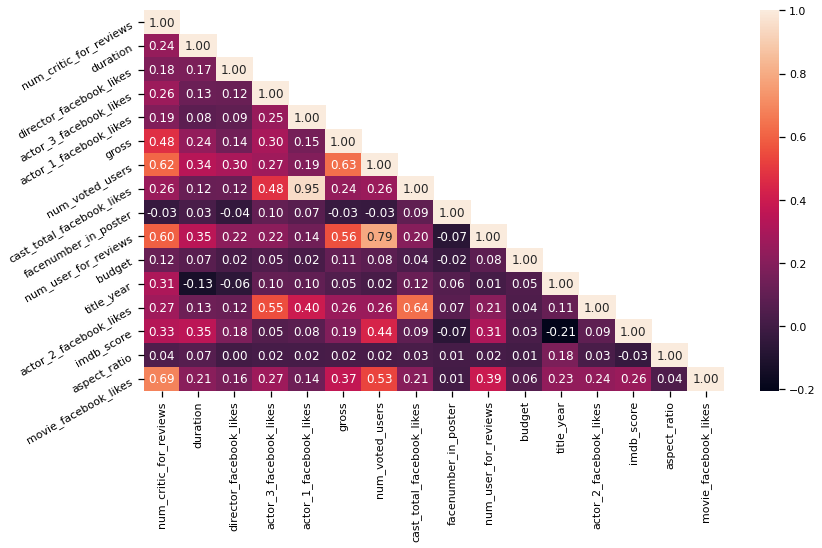

In [116]:
# vamos ver das colunas restantes, como elas se correlacionam entre si
# iremos utilizar um método chamado corr, do próprio pandas e a oartir disso gerar um heatmap

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

#create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [117]:
# podemos ver no gráfico que existe uma forte correlação entre o total de likes de todo o elenco com o total
# de likes do ator 1, portanto não faz sentido manter as duas
# também podemos ver que existe uma correlação dos likes dos atores 2 e 3 com o likes de todo o elenco
# portanto, iremos o remover a variável cast_total_facebook_likes e juntar os likes dos atores 2 e 3 numa
# única variável

df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [118]:
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes'],
        axis=1, inplace=True)

In [119]:
# também vemos que a variável num_user_for_reviews se correlaciona fortemente com 2 outras variáveis:
# num_voted_users e num_critic_for_reviews
# vamos criar uma nova variável que sera a razão entre num_critic_for_reviews e num_user_for_reviews
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [120]:
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

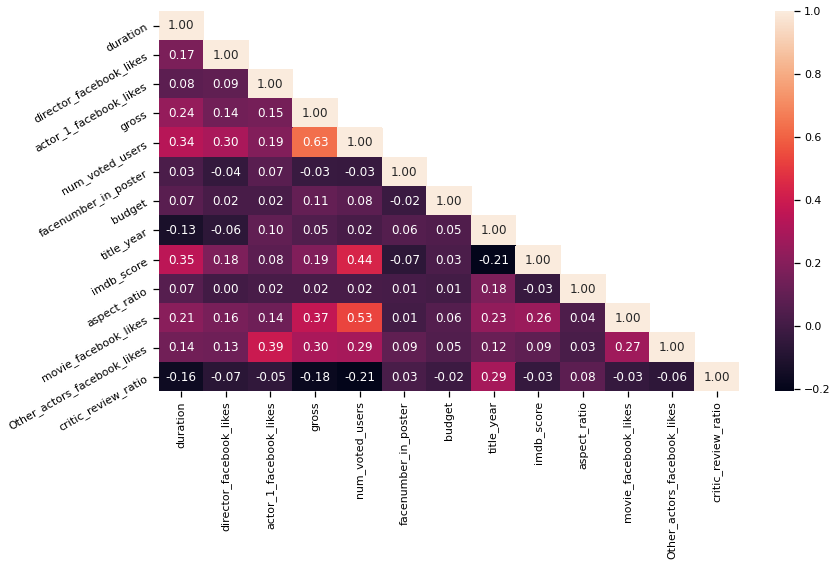

In [121]:
# agora que já removemos algumas variáveis e adicionamos outras,
# vamos ver como a correlação entre elas se comportam agora

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

#create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [122]:
# podemos ver que as correlações se matém todas abaixo de 0,65, então podemos seguir assim

In [123]:
# a nossa variável resposta é uma variável numérica e é um pouco mais complicado prever números quebrados
# então iremos dividir nossos filmes em categoria

df['imdb_binned_score'] = pd.cut(df['imdb_score'], bins=[0, 4, 6, 8, 10], right=True, labels=False)+1

In [124]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324,4


In [125]:
# iremos substituir a nossa variável categórica por outra com números
df = pd.get_dummies(data=df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [126]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [127]:
df.to_csv('dados_imdb_com_nota.csv', index=False)

## Construção do Algoritmo de ML

In [128]:
list(df.columns)

['duration',
 'director_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'facenumber_in_poster',
 'budget',
 'title_year',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'Other_actors_facebook_likes',
 'critic_review_ratio',
 'imdb_binned_score',
 'content_rating_G',
 'content_rating_GP',
 'content_rating_M',
 'content_rating_NC-17',
 'content_rating_Not Rated',
 'content_rating_PG',
 'content_rating_PG-13',
 'content_rating_Passed',
 'content_rating_R',
 'content_rating_TV-14',
 'content_rating_TV-G',
 'content_rating_TV-PG',
 'content_rating_Unrated',
 'content_rating_X']

In [132]:
# todo nosso dataframe, exceto a variável resposta
X=pd.DataFrame(columns=['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
                        'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
                        'title_year', 'aspect_ratio', 'imdb_score', 'movie_facebook_likes',
                        'Other_actors_facebook_likes', 'critic_review_ratio',
                        'content_rating_G', 'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
                        'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
                        'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
                        'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'], data=df)

In [133]:
# nosso dataframe apenas com a variável resposta
y=pd.DataFrame(columns=['imdb_binned_score'], data=df)

In [134]:
# dividir nossos dados em treinamento e test
# podemos ter os dados de validação também, mas para manter mais simples, não vamos ter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
# precisamos normalizar os nossos dados, para todos eles ficarem entre 0 e 1
#inicializar o normalizador
sc_X = StandardScaler()
#fit_transform calcula e aplica os ajustes que devem ser feitos nos dados de treino
X_train=sc_X.fit_transform(X_train)
#utiliza os ajustes calculados previamente nos dados de teste
X_test=sc_X.transform(X_test)

### Iremos utilizar o modelo de regressão logística

In [146]:
# estou definindo o modelo que quero usar / verbose = 1 determina que queremos vere o que está acontecendo enquanto
# o treinamento ocorre / max_iter diz quantas vezes podemos repetir o treinamento para ajustar o modelo
logit = LogisticRegression(verbose=1, max_iter=1000)
# Pega os dados que escolhemos e ajustar dentro da regressão
logit.fit(X_train,np.ravel(y_train, order='C'))
# Utilizando os dados de teste, retorna os dados preditos
y_pred=logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [147]:
y_pred

array([3, 3, 2, ..., 3, 3, 2])

In [149]:
from sklearn import metrics

# iremos calcular a matriz de confusão a partir dos dados y de teste + os dados preditos
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [165]:
# podemos imprimir a matriz de confusão diretamente ou utilizar esse código para facilitar a visualização
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This functions prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
        
    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt)),
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black'
        
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    plt.tight_layout()

In [158]:
cnf_matrix

array([[ 39,   6,   0,   0],
       [  2, 388,   2,   0],
       [  0,   2, 899,   3],
       [  0,   0,  18,  50]])

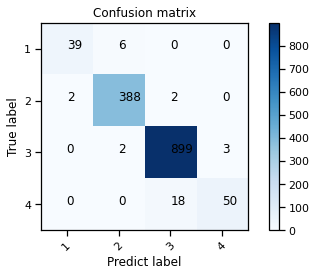

In [166]:
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3', '4'])

In [167]:
df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [169]:
print(metrics.classification_report(y_test, y_pred, target_names=['1', '2', '3', '4']))

              precision    recall  f1-score   support

           1       0.95      0.87      0.91        45
           2       0.98      0.99      0.98       392
           3       0.98      0.99      0.99       904
           4       0.94      0.74      0.83        68

    accuracy                           0.98      1409
   macro avg       0.96      0.90      0.93      1409
weighted avg       0.98      0.98      0.98      1409



In [171]:
#vamos salvar o modelo

import pickle

modelo_treinado = 'modelo_imdb.sav'
pickle.dump(logit, open(modelo_treinado, 'wb'))

In [172]:
# para carregar o modelo de volta

modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [174]:
# usando uma informação nova, podemos fazer inferências no modelo
modelo_carregado.predict([X_test[0]])

array([3])